Counter({100: 3, 25: 2, 20: 2, 49: 1, 41: 1, 40: 1, 99: 1, 23: 1, 26: 1, 75: 1, 32: 1, 12: 1})


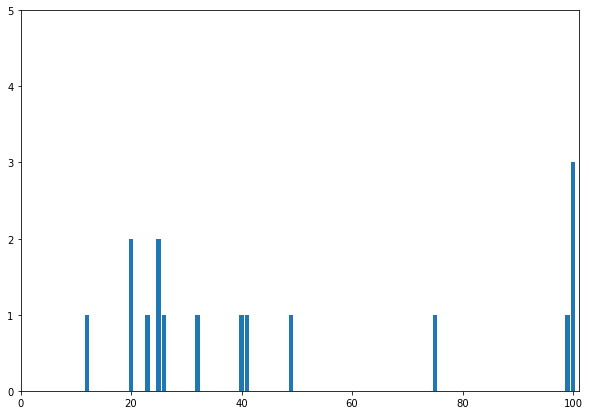

In [45]:
from collections import Counter
import matplotlib.pyplot as plt 
import math
num_friends = [100, 49, 41, 40, 25, 20, 25, 100, 99, 23, 26, 75, 32, 12, 100, 20]
friend_counts = Counter(num_friends)
print(friend_counts)
xs = range(max(num_friends) + 1)
ys = [friend_counts[i] for i in xs]



plt.figure(figsize=(10,7))
plt.axis([0, max(num_friends) + 1, 0, 5])
plt.bar(xs, ys)
plt.show()



In [19]:
sorted_values = sorted(num_friends, reverse=True)
print(sorted_values)


[100, 100, 100, 99, 75, 49, 41, 40, 32, 26, 25, 25, 23, 20, 20, 12]


In [50]:
def mean(array):
    return sum(array) / len(array)

def median(array):
    n = int(len(array) / 2)
    sorted_array = sorted(array)

    if n % 2 == 0:
        return ((sorted_array[n - 1]) + sorted_array[n]) / 2.0
    else:
        return sorted_array[n]

def quantile(array, p):
    n = int(len(array) * p)
    sorted_array = sorted(array)

    return sorted_array[n]

def data_range(array):
    return max(array) - min(array)

def de_mean(array):
    mean_ = mean(array)
    return [(x - mean_) for x in array]

def sum_of_squares(array):
    sum_of_sq = 0.0
    for i in array:
        sum_of_sq += i ** 2
    return sum_of_sq

def variance(array):
    deviations = de_mean(array)
    sum_of_sq = sum_of_squares(deviations)
    n = len(array)
    return sum_of_sq / (n - 1)

def st_deviation(array):
    return math.sqrt(variance(array))

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)


num_friends = [100, 49, 41, 40, 25, 20, 25, 100, 99, 23, 26, 75, 32, 12, 100, 20]

print('Mean:', mean(num_friends))
print('Median:', median(num_friends))
print('Quantile 0.25:', quantile(num_friends, 0.25))
print('Quantile 0.6:', quantile(num_friends, 0.6))
print('Quantile 0.9:', quantile(num_friends, 0.9))
print('Range:', data_range(num_friends))
print('Variance:', variance(num_friends))
print('Standard Deviation:', st_deviation(num_friends))
print('Interquartile Range:', interquartile_range(num_friends))


Mean: 49.1875
Median: 36.0
Quantile 0.25: 25
Quantile 0.6: 41
Quantile 0.9: 100
Range: 88
Variance: 1121.3625
Standard Deviation: 33.48675111144705
Interquartile Range: 74


In [150]:
import numpy as np

num_friends = [abs(int(x)) for x in np.random.normal(loc=50, scale=20, size=200)]

daily_minutes_spent = [int(x**1.1) for x in num_friends]

print(num_friends)
print(daily_minutes_spent)

[59, 43, 81, 55, 37, 55, 37, 66, 10, 42, 63, 52, 59, 62, 53, 85, 61, 78, 45, 46, 2, 14, 62, 61, 48, 64, 28, 82, 45, 44, 20, 33, 35, 64, 65, 28, 31, 108, 48, 80, 70, 21, 74, 7, 88, 72, 45, 67, 41, 41, 38, 55, 55, 65, 51, 30, 48, 28, 53, 43, 23, 35, 38, 38, 28, 71, 53, 85, 49, 45, 37, 24, 32, 52, 71, 53, 86, 54, 91, 53, 79, 55, 64, 31, 55, 36, 39, 71, 43, 68, 40, 43, 34, 46, 23, 66, 44, 55, 39, 62, 2, 63, 31, 54, 27, 34, 59, 39, 26, 26, 17, 69, 29, 49, 50, 42, 19, 51, 31, 101, 24, 51, 44, 35, 32, 21, 20, 38, 92, 46, 43, 81, 53, 78, 69, 59, 63, 37, 106, 64, 27, 82, 46, 62, 74, 80, 70, 35, 11, 42, 58, 41, 47, 38, 50, 53, 45, 47, 36, 31, 54, 65, 28, 58, 44, 99, 18, 56, 42, 19, 34, 57, 40, 41, 44, 14, 42, 22, 68, 3, 55, 75, 59, 29, 51, 60, 61, 55, 47, 6, 36, 61, 53, 62, 32, 25, 40, 44, 42, 68]
[88, 62, 125, 82, 53, 82, 53, 100, 12, 61, 95, 77, 88, 93, 78, 132, 92, 120, 65, 67, 2, 18, 93, 92, 70, 97, 39, 127, 65, 64, 26, 46, 49, 97, 98, 39, 43, 172, 70, 123, 107, 28, 113, 8, 137, 110, 65, 102

In [151]:
def dot(x, y):
    if len(x) != len(y):
        print('Vector length must be the same!')
        return None
    return sum([i * j for i, j in zip(x, y)])

def covariance(x, y, population=False):
    if len(x) != len(y):
        print('Vector length must be the same!')
        return None
    if population:
        return dot(de_mean(x), de_mean(y)) / len(x)
    else:
        return dot(de_mean(x), de_mean(y)) / (len(x) - 1)

covariance(num_friends, daily_minutes_spent, population=True)

660.1290999999999

In [203]:
def correlation(x, y, population=False):
    x_std = st_deviation(x)
    y_std = st_deviation(y)

    return covariance(x, y, population=population) / (x_std * y_std)


num_friends = [abs(int(x)) for x in np.random.normal(loc=50, scale=20, size=200)]


daily_minutes_spent = [int(x**1.1) for x in num_friends]

print('Covariance:', covariance(num_friends, daily_minutes_spent))
print('Correlation:', correlation(num_friends, daily_minutes_spent))

Covariance: 619.7121859296485
Correlation: 0.9993844181208078
